In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Load in scraped data csv and describe()

#### - The max Opening Box Office(Box_office_opening) recorded for a WB film was roughly:     $169,189,400

#### - The max Total Box Office(Box_office) recorded for a WB film was roughly:    $1,342,000,000

#### - The mean Total Box Office return is $181,748,600 with a standard deviation of ~230 Million

#### - In the period 2000-2019, WB has made $76,761,700,672 in revenue from feature films.

In [64]:
all_data = pd.read_csv('./WB_movie_data_cleaned.csv')
df.describe()

,Release_month,Running_time_min,Budget,Box_office,Box_office_opening
count,417.000000,417.000000,4.170000e+02,4.170000e+02,4.170000e+02
mean,6.832134,113.261391,6.245225e+07,1.816109e+08,2.248659e+07
std,3.362780,20.508002,5.385315e+07,2.290150e+08,2.673120e+07
min,1.000000,40.000000,7.000000e+04,2.514950e+05,5.760000e+02
25%,4.000000,100.000000,2.500000e+07,4.040000e+07,6.422455e+06
50%,7.000000,110.000000,4.200000e+07,9.400000e+07,1.373107e+07
75%,9.000000,124.000000,8.000000e+07,2.168000e+08,2.751587e+07
max,12.000000,219.000000,3.000000e+08,1.342000e+09,1.691894e+08


In [55]:
df.sum()[['Budget','Box_office']]

Budget        25987590000.0
Box_office    75607432705.0
dtype: object



# 	**Create correlation heatmap for relevant indicators**
#### - Production Budget(Budget), Total Box Office(Box_office), and Opening Box Office(Box_office_opening) all highly correlated.
#### - Run time(Running_time_min) correlates most with Production Budget but not much with other variables.



<AxesSubplot:>

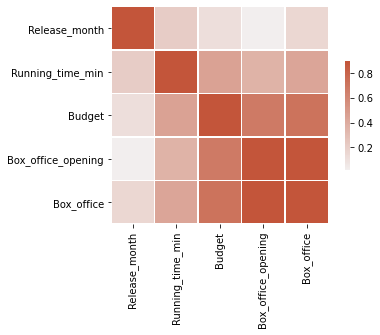

In [56]:
# create correlation matrix
corr_matrix = df[['Release_month', 'Running_time_min', 'Budget', 'Box_office_opening', 'Box_office']].corr()

# create dataframe correlation heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Aggregate values for each relevant indicator

## No. of Lead Actor credits aggregated by actor over the period 2000-2019

#### - Sandra Bullock and Daniel Radcliffe have the most lead actor credits in a WB film with 9 and 8 respectively.
#### - George Clooney, Ben Affleck, and Leonardo Dicaprio are close behind with 7 each

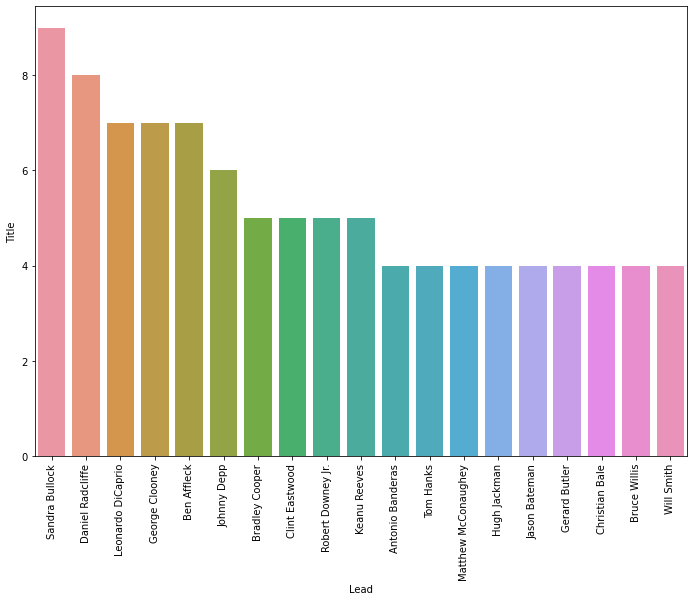

In [57]:
# select actors who appeared in a WB movie more than 3 times
actors_freq = df.groupby('Lead').count()
actors = actors_freq[actors_freq['Title'] > 3]
actors = actors[['Title']].sort_values(by=['Title'], ascending=False)

# create seaborn barplot with x = actors, y = #of occurences
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
chart = sns.barplot(x=actors.index, y=actors['Title'], ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()


###### Total Box office and Opening Box office aggregated by release month over the period 2000-2019

#### - November has the greatest AggregateTotal Box office numbers at $12,406,670,000 

#### - May has the greatest Aggregate Opening Box Office numbers at $1,197,627,000

#### - January April and October have the worst Aggregate Opening and Total Box Office numbers.

               Box_office_opening    Box_office
Release_month                                  
1.0                  3.297278e+08  2.041610e+09
2.0                  6.248303e+08  3.710300e+09
3.0                  8.579940e+08  5.240251e+09
4.0                  3.264006e+08  2.202700e+09
5.0                  1.197627e+09  9.772600e+09
6.0                  1.035555e+09  7.323700e+09
7.0                  1.093610e+09  8.855600e+09
8.0                  8.204302e+08  6.704500e+09
9.0                  7.420313e+08  5.158700e+09
10.0                 3.346654e+08  2.941200e+09
11.0                 1.258217e+09  1.240667e+10
12.0                 7.325169e+08  9.249600e+09


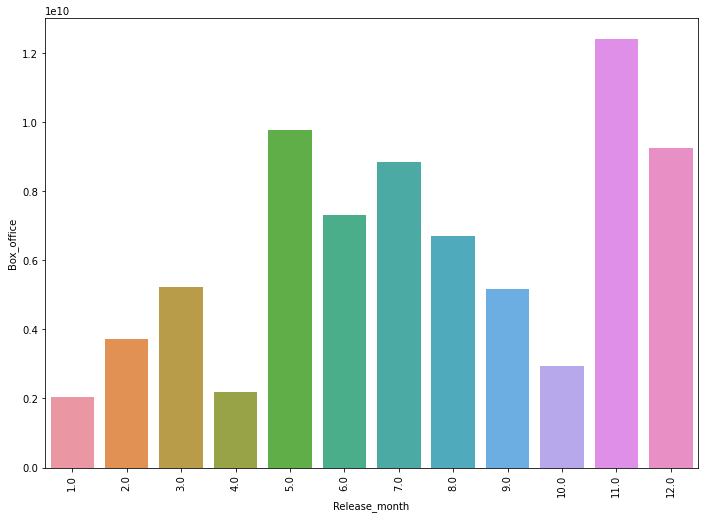

In [59]:
# aggregate box office metrics by release months
box_bymonth = df.groupby('Release_month').sum()[['Box_office_opening','Box_office']]
print(box_bymonth)

# create seaborn barplot with x = release month, y = total box office, opening box office
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
chart = sns.barplot(x=box_bymonth.index, y=box_bymonth['Box_office'], ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

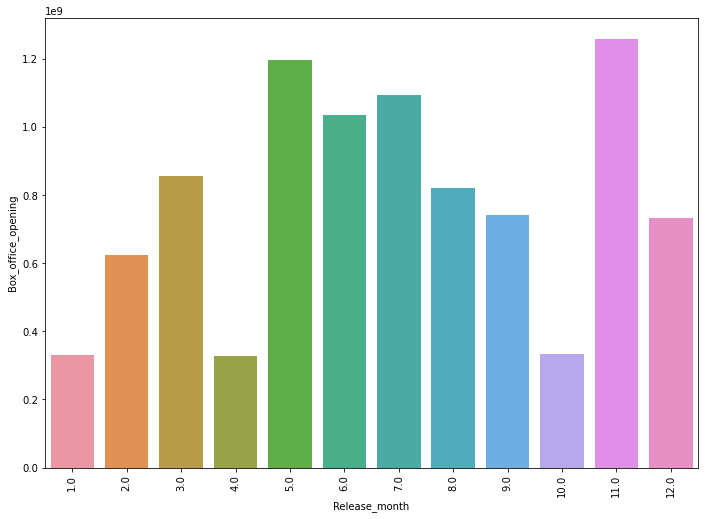

In [60]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
chart = sns.barplot(x=box_bymonth.index, y=box_bymonth['Box_office_opening'], ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

# Highest performing Lead actors measured by aggregate total box office per actor

#### - Daniel Radcliffe has pulled in just under $7.8 Billion for WB.

#### - The next highest performing actors are Ian McKellen and Christian Bale, pulling in 2.9 Billion and 2.8 Billion respectively.

In [61]:
actors_revenue = df.groupby('Lead').sum()
actors_revenue = actors_revenue[['Box_office']].sort_values(by=['Box_office'], ascending=False)
actors_revenue

,Box_office
Lead,
Daniel Radcliffe,7.775000e+09
Ian McKellen,2.931400e+09
Christian Bale,2.831000e+09
Bradley Cooper,2.401700e+09
Ben Affleck,2.274600e+09
Leonardo DiCaprio,2.070800e+09
Sandra Bullock,1.982300e+09
George Clooney,1.646100e+09
Will Smith,1.579400e+09
